# Testing Vader Sentiment

## Set-Up and Imports

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
texts = [
    "I'm not gonna kill myself more",
    "i am like secretly hoping i get kicked so i dun have to do sypt this yr anymore",
    "surprisingly, not dead, still not dead",
    "we are scrounging together something presentable",
    "cause we'll just get laughed at into oblivion",
    "i got kicked :(((",
    "I really want to kill myself",
    "\"torture.pdf\" lmao",
    "and I wanna kill myself"
]


In [68]:
texts = [i[i.index(": ")+2:] for i in """[14/9/20, 7:15:29 PM] Vikram NUSH: Ahhhhh
[14/9/20, 7:15:35 PM] Prannaya: *only*
[14/9/20, 7:15:39 PM] Prannaya: you have 2 mins
[14/9/20, 7:15:41 PM] Vikram NUSH: Kill me now I want to die shit anxiety attack ah shit ahhhhhhh
[14/9/20, 7:15:44 PM] Vikram NUSH: I need to go calm down
[14/9/20, 7:15:51 PM] Prannaya: if you have 250 words you can slow down
[14/9/20, 7:15:51 PM] Vikram NUSH: I go through my script in a minute
[14/9/20, 7:16:20 PM] Prannaya: say it in an articulate manner and you'll be fine""".split("\n")]
texts[0]


'Ahhhhh'

## Testing the Analyzer

In [69]:
analyzer = SentimentIntensityAnalyzer()
sentiments = [{"texts": text, **analyzer.polarity_scores(text)} for text in texts]
df = pd.DataFrame(sentiments)
df

,texts,neg,neu,pos,compound
0,Ahhhhh,0.000,1.000,0.000,0.0000
1,*only*,0.000,1.000,0.000,0.0000
2,you have 2 mins,0.000,1.000,0.000,0.0000
3,Kill me now I want to die shit anxiety attack ...,0.738,0.215,0.047,-0.9652
4,I need to go calm down,0.000,0.685,0.315,0.3182
5,if you have 250 words you can slow down,0.000,1.000,0.000,0.0000
6,I go through my script in a minute,0.000,1.000,0.000,0.0000
7,say it in an articulate manner and you'll be fine,0.000,0.833,0.167,0.2023


## Sliding Window Aggregation

In [70]:
df.rolling(4).mean().dropna()

,neg,neu,pos,compound
3,0.1845,0.80375,0.01175,-0.241300
4,0.1845,0.72500,0.09050,-0.161750
5,0.1845,0.72500,0.09050,-0.161750
6,0.1845,0.72500,0.09050,-0.161750
7,0.0000,0.87950,0.12050,0.130125


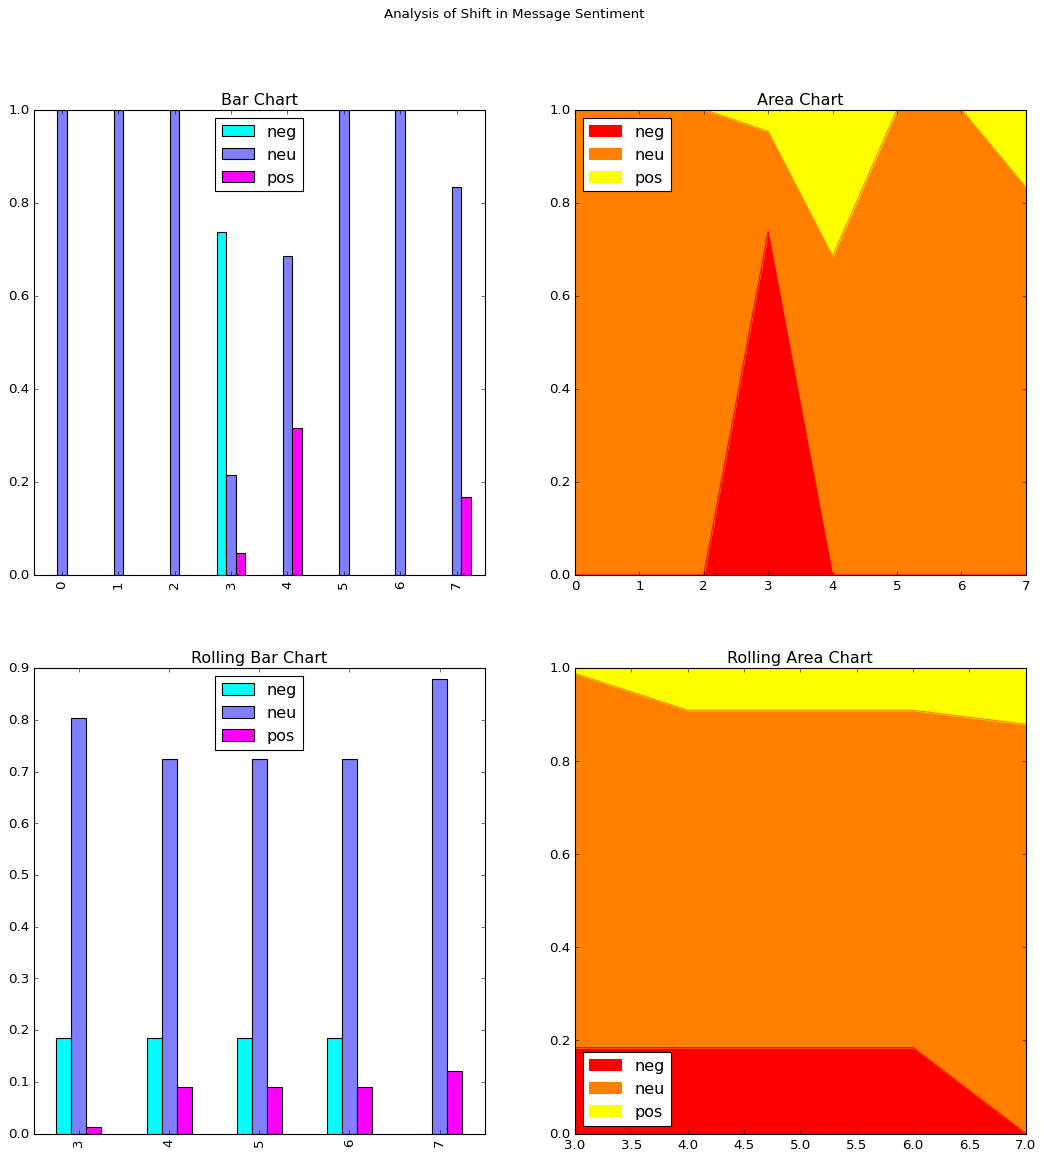

In [73]:
#plt.style.use("fivethirtyeight")
plt.style.use("classic")

fig, axes = plt.subplots(2, 2, figsize=(16, 16))

fig.patch.set_facecolor('#ffffff')
fig.patch.set_alpha(0.7)

df[["neg", "neu", "pos"]].plot.bar(ax=axes[0, 0], cmap="cool", title="Bar Chart")
df[["neg", "neu", "pos"]].plot.area(stacked=True, ax=axes[0, 1], cmap="autumn", title="Area Chart", xlim=(0, len(texts)-1), ylim=(0, 1))

df.rolling(4).mean().dropna()[["neg", "neu", "pos"]].plot.bar(
    ax=axes[1, 0], cmap="cool", title="Rolling Bar Chart")
df.rolling(4).mean().dropna()[["neg", "neu", "pos"]].plot.area(
    stacked=True, ax=axes[1, 1], cmap="autumn", title="Rolling Area Chart", xlim=(4-1, len(texts)-1), ylim=(0, 1))

plt.suptitle("Analysis of Shift in Message Sentiment")
plt.savefig('img/eda.png', transparent=False, dpi=400)
